<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/CNN%20using%20Train%20Generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import os

In [2]:
p = Path('/content/drive/MyDrive/images')

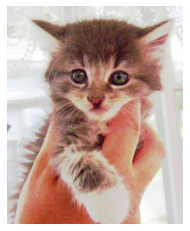

In [3]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

sample_path = "/content/drive/MyDrive/images/cats/cat.100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import *

In [5]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [7]:
#model.fit() can be used as this is a small dataset but let's try something new

from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory(
    "/content/drive/MyDrive/images/",
    target_size = (150,150),
    batch_size = 32,
    class_mode='categorical'
    )

Found 808 images belonging to 4 classes.


In [8]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              steps_per_epoch=7
                              )

Epoch 1/20
7/7 [==============================] - 1s 86ms/step - loss: 0.8074 - accuracy: 0.6473
Epoch 2/20
7/7 [==============================] - 1s 74ms/step - loss: 0.6766 - accuracy: 0.7200
Epoch 3/20
7/7 [==============================] - 1s 213ms/step - loss: 0.7193 - accuracy: 0.6830
Epoch 4/20
7/7 [==============================] - 1s 97ms/step - loss: 0.7130 - accuracy: 0.6920
Epoch 5/20
7/7 [==============================] - 1s 89ms/step - loss: 0.5882 - accuracy: 0.7321
Epoch 6/20
7/7 [==============================] - 1s 91ms/step - loss: 0.6162 - accuracy: 0.7411
Epoch 7/20
7/7 [==============================] - 1s 97ms/step - loss: 0.5732 - accuracy: 0.7500
Epoch 8/20
7/7 [==============================] - 1s 101ms/step - loss: 0.5918 - accuracy: 0.7679
Epoch 9/20
7/7 [==============================] - 1s 93ms/step - loss: 0.5172 - accuracy: 0.7812
Epoch 10/20
7/7 [==============================] - 1s 89ms/step - loss: 0.5336 - accuracy: 0.7850
Epoch 11/20
7/7 [==========

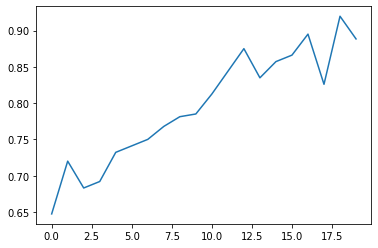

In [12]:
plt.plot(history.history['accuracy'])
plt.show()

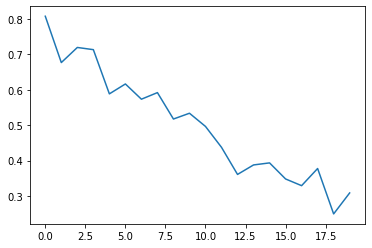

In [13]:
plt.plot(history.history['loss'])
plt.show()